In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

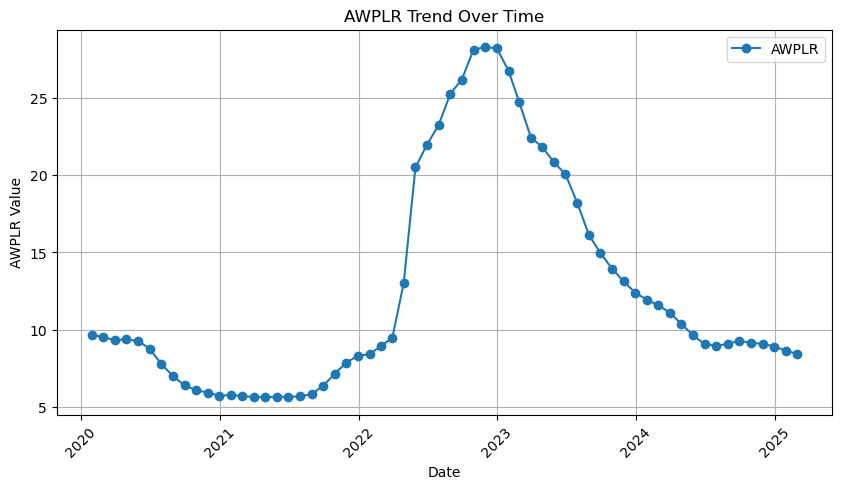

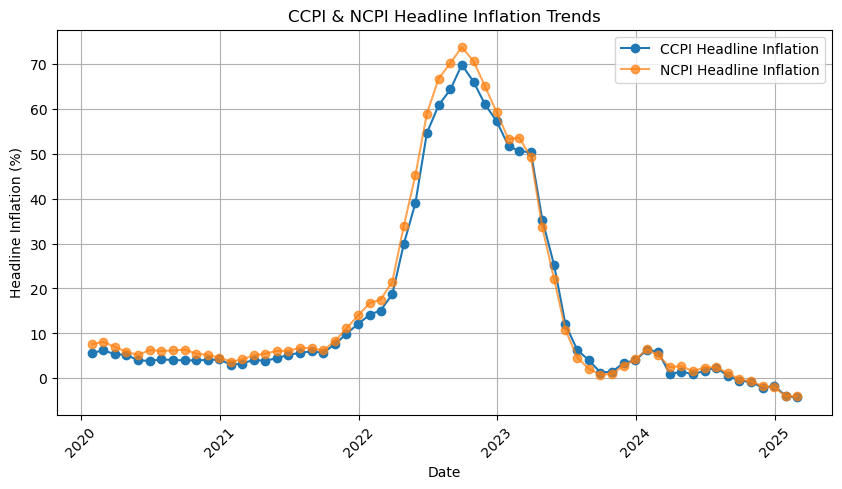

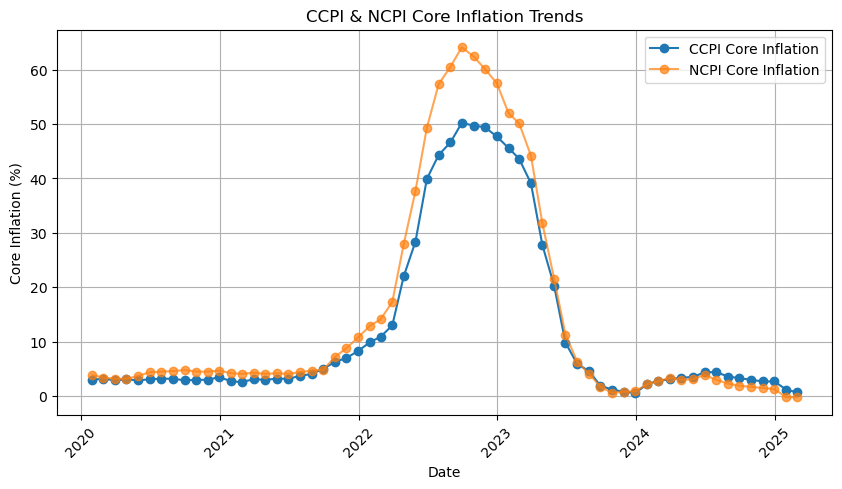

In [126]:
awplr_inflation_data = pd.read_csv("../data/awplr_inflation_data_till_2020.csv")  # Read without headers

# Ensure Date column is in datetime format
awplr_inflation_data["Date"] = pd.to_datetime(awplr_inflation_data["Date"])

#AWPLR Trend Over Time
plt.figure(figsize=(10, 5))
plt.plot(awplr_inflation_data["Date"], awplr_inflation_data["AWPLR"], marker='o', linestyle='-', label="AWPLR")
plt.xlabel("Date")
plt.ylabel("AWPLR Value")
plt.title("AWPLR Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#Headline Inflation Trends (CCPI and NCPI)
plt.figure(figsize=(10, 5))
plt.plot(awplr_inflation_data["Date"], awplr_inflation_data["CCPI_Headline"], marker='o', linestyle='-', label="CCPI Headline Inflation")
plt.plot(awplr_inflation_data["Date"], awplr_inflation_data["NCPI_Headline"], marker='o', linestyle='-', label="NCPI Headline Inflation", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Headline Inflation (%)")
plt.title("CCPI & NCPI Headline Inflation Trends")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#Core Inflation Trends (CCPI and NCPI)
plt.figure(figsize=(10, 5))
plt.plot(awplr_inflation_data["Date"], awplr_inflation_data["CCPI_Core"], marker='o', linestyle='-', label="CCPI Core Inflation")
plt.plot(awplr_inflation_data["Date"], awplr_inflation_data["NCPI_Core"], marker='o', linestyle='-', label="NCPI Core Inflation", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Core Inflation (%)")
plt.title("CCPI & NCPI Core Inflation Trends")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


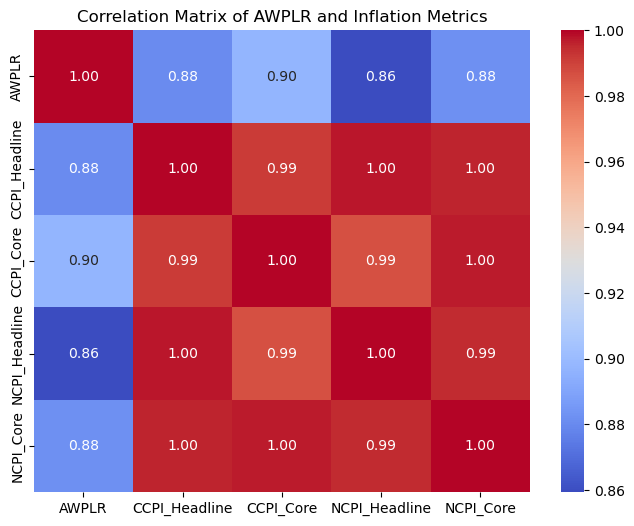

In [5]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(awplr_inflation_data[["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of AWPLR and Inflation Metrics")
plt.show()



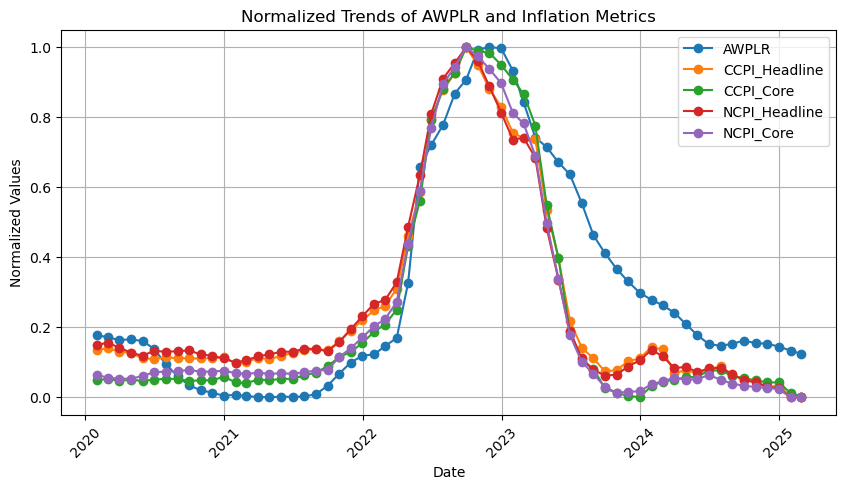

In [4]:
# Normalize the data for better visualization (excluding Date column)
scaler = MinMaxScaler()
normalized_data = awplr_inflation_data.copy()
normalized_data[["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]] = scaler.fit_transform(
    awplr_inflation_data[["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]])

#Normalized Trends for Comparison
plt.figure(figsize=(10, 5))
for col in ["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]:
    plt.plot(normalized_data["Date"], normalized_data[col], marker='o', linestyle='-', label=col)
plt.xlabel("Date")
plt.ylabel("Normalized Values")
plt.title("Normalized Trends of AWPLR and Inflation Metrics")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [7]:
Q1 = awplr_inflation_data.quantile(0.25)
Q3 = awplr_inflation_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((awplr_inflation_data < (Q1 - 1.5 * IQR)) | (awplr_inflation_data > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
Date              0
AWPLR             3
CCPI_Headline    12
CCPI_Core        12
NCPI_Headline    11
NCPI_Core        12
dtype: int64


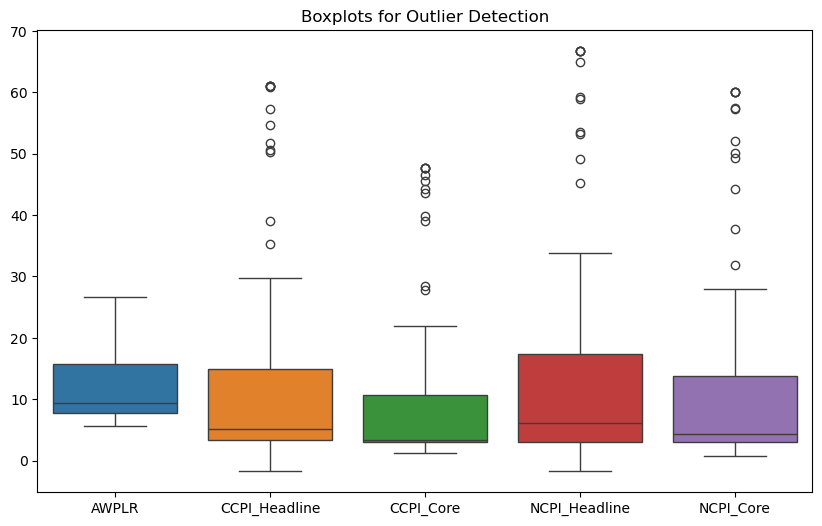

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=awplr_inflation_data[["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]])
plt.title("Boxplots for Outlier Detection")
plt.show()

In [15]:
from scipy.stats.mstats import winsorize

# Winsorize only the numeric columns
for col in ["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]:
    awplr_inflation_data[col] = winsorize(awplr_inflation_data[col], limits=[0.05, 0.05])  # Cap the bottom/top 5%



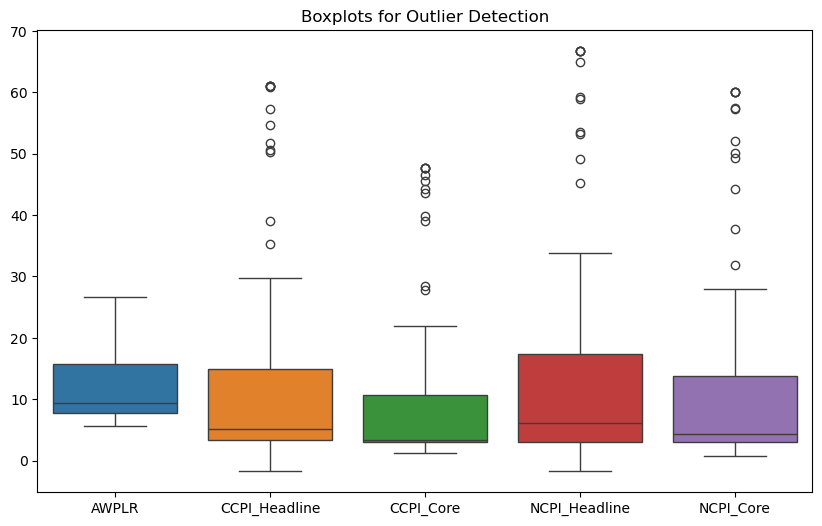

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=awplr_inflation_data[["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]])
plt.title("Boxplots for Outlier Detection")
plt.show()

In [19]:
Q1 = awplr_inflation_data.quantile(0.25)
Q3 = awplr_inflation_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((awplr_inflation_data < (Q1 - 1.5 * IQR)) | (awplr_inflation_data > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
Date              0
AWPLR             0
CCPI_Headline    12
CCPI_Core        12
NCPI_Headline    11
NCPI_Core        12
dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


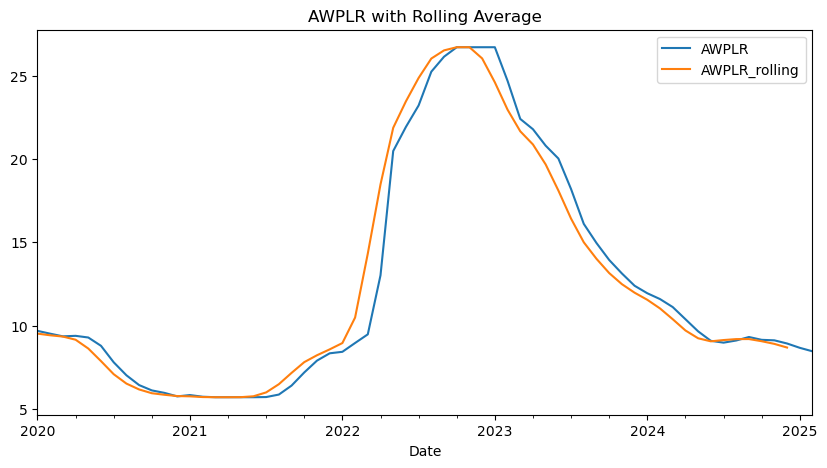

In [21]:
awplr_inflation_data.set_index("Date", inplace=True)
awplr_inflation_data["AWPLR_rolling"] = awplr_inflation_data["AWPLR"].rolling(window=3).mean()

awplr_inflation_data[["AWPLR", "AWPLR_rolling"]].plot(figsize=(10, 5), title="AWPLR with Rolling Average")
plt.show()



/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_53349/3785191156.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(awplr_inflation_data["AWPLR"], label="AWPLR", shade=True)
/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_53349/3785191156.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(awplr_inflation_data["CCPI_Core"], label="CCPI_Core Inflation", shade=True)


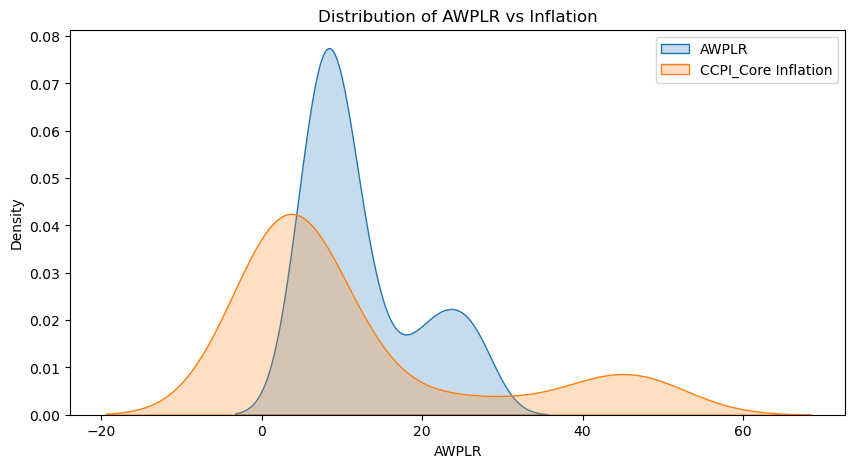

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.kdeplot(awplr_inflation_data["AWPLR"], label="AWPLR", shade=True)
sns.kdeplot(awplr_inflation_data["CCPI_Core"], label="CCPI_Core Inflation", shade=True)
plt.title("Distribution of AWPLR vs Inflation")
plt.legend()
plt.show()



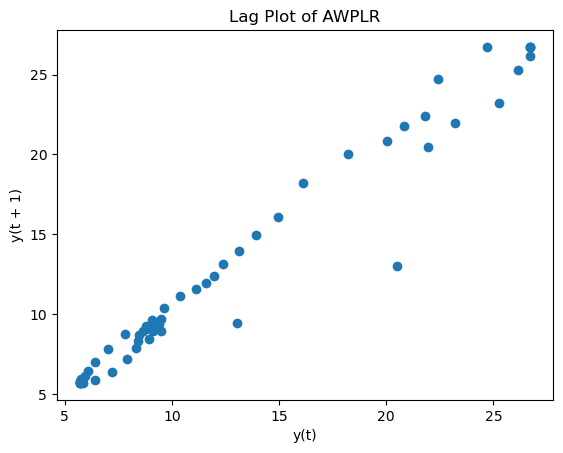

In [25]:
from pandas.plotting import lag_plot
lag_plot(awplr_inflation_data["AWPLR"])
plt.title("Lag Plot of AWPLR")
plt.show()

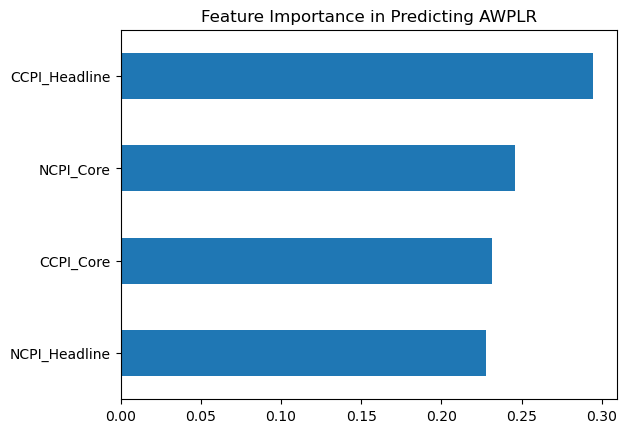

In [27]:
from sklearn.ensemble import RandomForestRegressor
X = awplr_inflation_data[["CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]]
y = awplr_inflation_data["AWPLR"]

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind="barh", title="Feature Importance in Predicting AWPLR")
plt.show()


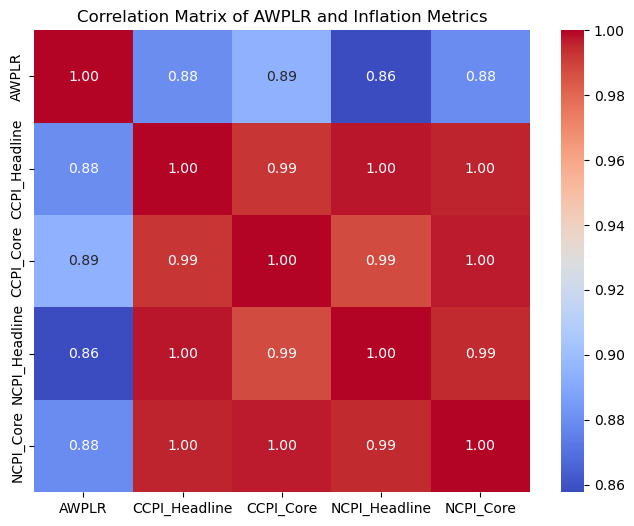

In [29]:
# Plot 4: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(awplr_inflation_data[["AWPLR", "CCPI_Headline", "CCPI_Core", "NCPI_Headline", "NCPI_Core"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of AWPLR and Inflation Metrics")
plt.show()

### Prediction Model

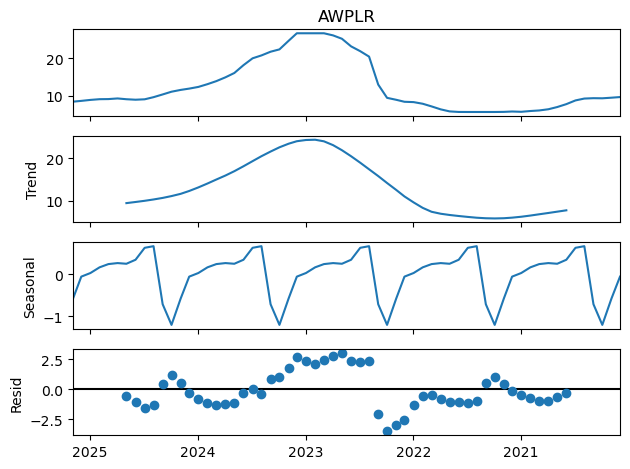

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(awplr_inflation_data["AWPLR"], model='additive', period=12)
result.plot()
plt.show()


In [33]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(awplr_inflation_data["AWPLR"])
print(f"ADF Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


ADF Test Statistic: -2.1368016715391347
p-value: 0.2299761720859257


##### Therefore AWLPR time series is NOT stationary.

In [35]:
awplr_inflation_data["AWPLR_diff"] = awplr_inflation_data["AWPLR"].diff().dropna()


In [37]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(awplr_inflation_data["AWPLR_diff"].dropna())
print(f"ADF Test Statistic after differencing: {adf_test[0]}")
print(f"p-value after differencing: {adf_test[1]}")


ADF Test Statistic after differencing: -3.498425669143096
p-value after differencing: 0.008027618386385991


## Model Selection and Training, Model Evaluation and Prediction

### Use RandomForestRegressor to predict

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Fill missing values using forward fill
awplr_inflation_data = awplr_inflation_data.ffill()

# Adding Time-Based Features
awplr_inflation_data["Year"] = awplr_inflation_data.index.year
awplr_inflation_data["Month"] = awplr_inflation_data.index.month

# Selecting relevant features
features = ["CCPI_Core", "CCPI_Headline", "NCPI_Headline", "NCPI_Core", "Year", "Month"]
target = "AWPLR"

# Define X (features) and y (target)
X = awplr_inflation_data[features]
y = awplr_inflation_data[target]

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display accuracy metrics
accuracy_metrics = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae, mse, rmse, r2]
})

print(accuracy_metrics)


                           Metric     Value
0       Mean Absolute Error (MAE)  1.054692
1        Mean Squared Error (MSE)  1.889670
2  Root Mean Squared Error (RMSE)  1.374653
3                  R-Squared (R²)  0.956294


        Date  AWPLR_Prediction
0 2025-01-31           11.6836
1 2025-02-28           11.6872
2 2025-03-31           11.6153
3 2025-04-30           11.6640
4 2025-05-31           11.7270


/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_53349/549711538.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2025-1-31", periods=5, freq='M')


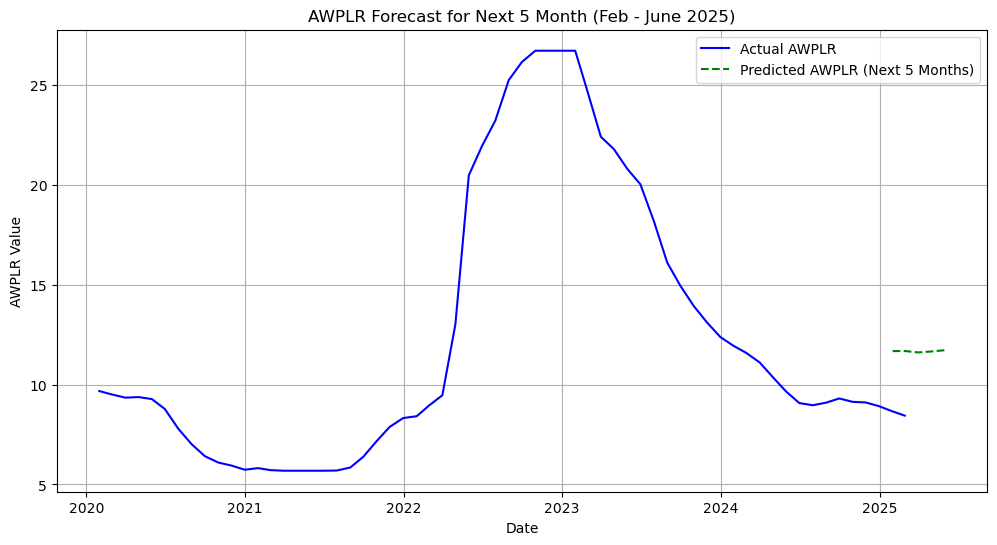

In [41]:
# Generate future dates for the next 5 months
future_dates = pd.date_range(start="2025-1-31", periods=5, freq='M')

# Create a DataFrame with future features
future_X = pd.DataFrame(np.tile(X.iloc[-1].values, (5, 1)), columns=features, index=future_dates)

# Update year, month, and day features correctly
future_X["Year"] = future_X.index.year
future_X["Month"] = future_X.index.month

# Predict AWPLR for future dates
future_y = rf_model.predict(future_X)

# Create Forecast DataFrame
forecast_rf_df = pd.DataFrame({"Date": future_dates, "AWPLR_Prediction": future_y})

print(forecast_rf_df)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(awplr_inflation_data.index, awplr_inflation_data["AWPLR"], label="Actual AWPLR", color="blue")
plt.plot(forecast_rf_df["Date"], forecast_rf_df["AWPLR_Prediction"], label="Predicted AWPLR (Next 5 Months)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("AWPLR Value")
plt.title("AWPLR Forecast for Next 5 Month (Feb - June 2025)")
plt.legend()
plt.grid()
plt.show()


✔ High Accuracy: With R² = 0.956, the model fits well to the data.
✔ Low Error: RMSE and MAE values indicate a small deviation from actual AWPLR values.
✔ Reliable for Short-Term Forecasting: Random Forest models are generally better for short- to medium-term predictions

                           Metric     Value
0       Mean Absolute Error (MAE)  0.800704
1        Mean Squared Error (MSE)  0.663610
2  Root Mean Squared Error (RMSE)  0.814623
3                  R-Squared (R²) -8.412375
                 Date  AWPLR_Prediction
2025-03-31 2025-02-28          8.250120
2025-04-30 2025-03-31          8.140049
2025-05-31 2025-04-30          8.037133
2025-06-30 2025-05-31          7.955196
2025-07-31 2025-06-30          7.893981


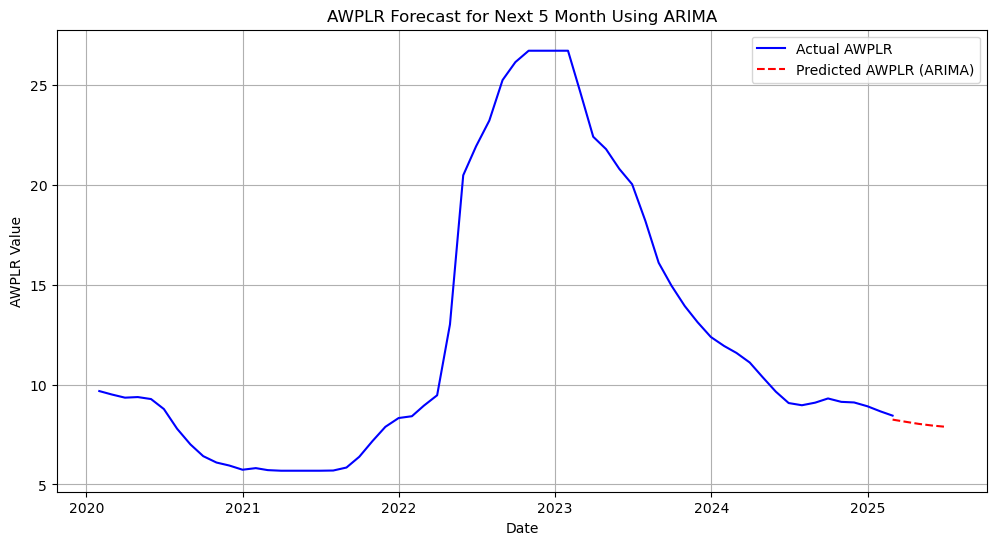

In [43]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

awplr_inflation_data = awplr_inflation_data.asfreq('M')  # Ensure data is in monthly frequency


# Apply Differencing (First-Order) to Make Data Stationary
awplr_inflation_data["AWPLR_diff"] = awplr_inflation_data["AWPLR"].diff().dropna()

# Fit ARIMA Model (p, d, q) = (3,1,3) based on previous analysis
arima_model = ARIMA(awplr_inflation_data["AWPLR"].dropna(), order=(3,1,3))
arima_fit = arima_model.fit()

# Forecast for Next 5 Months (Feb - June 2025)
forecast_steps = 5  # 5 month ahead
forecast_values = arima_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates_arima = pd.date_range(start=awplr_inflation_data.index[-1], periods=forecast_steps, freq='M')

# Convert forecast to DataFrame
forecast_arima_df = pd.DataFrame({"Date": future_dates_arima, "AWPLR_Prediction": forecast_values})

# Compute ARIMA Model Accuracy
actual_values = awplr_inflation_data["AWPLR"].dropna().iloc[-forecast_steps:]  # Last 'forecast_steps' actual values
predicted_values = forecast_values[:len(actual_values)]  # Matching forecasted values

# Calculate accuracy metrics
mae_arima = mean_absolute_error(actual_values, predicted_values)
mse_arima = mean_squared_error(actual_values, predicted_values)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(actual_values, predicted_values)

# Display accuracy metrics
accuracy_arima = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae_arima, mse_arima, rmse_arima, r2_arima]
})

print(accuracy_arima)
print(forecast_arima_df)

# Plot Actual vs Forecasted Values
plt.figure(figsize=(12,6))
plt.plot(awplr_inflation_data.index, awplr_inflation_data["AWPLR"], label="Actual AWPLR", color="blue")
plt.plot(forecast_arima_df["Date"], forecast_arima_df["AWPLR_Prediction"], label="Predicted AWPLR (ARIMA)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("AWPLR Value")
plt.title("AWPLR Forecast for Next 5 Month Using ARIMA")
plt.legend()
plt.grid()
plt.show()


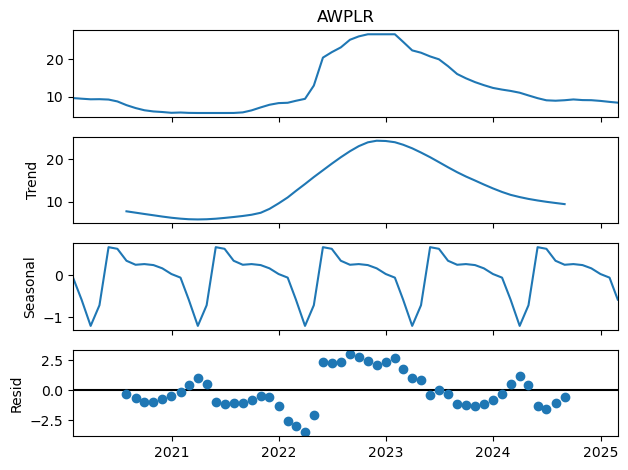

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Seasonal decomposition
decomposition = seasonal_decompose(awplr_inflation_data["AWPLR"], model="additive", period=12)
decomposition.plot()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                 Date  AWPLR_Prediction
2025-01-31 2024-12-31              8.33
2025-02-28 2025-01-31              8.01
2025-03-31 2025-02-28              7.86
2025-04-30 2025-03-31              7.65
2025-05-31 2025-04-30              7.73


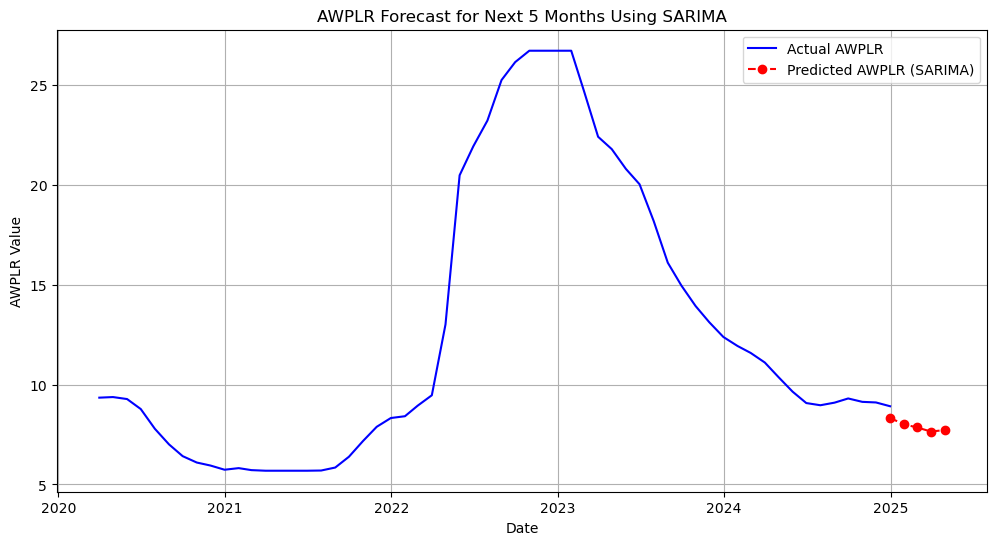

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Define SARIMA Model with Seasonal Components
sarima_model = SARIMAX(
    awplr_inflation_data["AWPLR"],
    order=(2,1,2),         # ARIMA terms (p,d,q)
    seasonal_order=(0,1,1,52),  # Seasonal terms (P,D,Q,s) 
    enforce_stationarity=False,
    enforce_invertibility=False
)


# Fit the model
sarima_fit = sarima_model.fit()

# Forecast for Next 5 Months (Feb - June 2025)
forecast_steps = 5  # 1 month ahead
forecast_values = sarima_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates_sarima = pd.date_range(start=awplr_inflation_data.index[-1], periods=forecast_steps, freq='M')

# Convert forecast to DataFrame
forecast_sarima_df = pd.DataFrame({"Date": future_dates_sarima, "AWPLR_Prediction": forecast_values})

# Display forecasted values
print(forecast_sarima_df)

# Plot Actual vs Forecasted Values
plt.figure(figsize=(12,6))
plt.plot(awplr_inflation_data.index, awplr_inflation_data["AWPLR"], label="Actual AWPLR", color="blue")
plt.plot(forecast_sarima_df["Date"], forecast_sarima_df["AWPLR_Prediction"], label="Predicted AWPLR (SARIMA)", color="red", linestyle="dashed", marker='o')
plt.xlabel("Date")
plt.ylabel("AWPLR Value")
plt.title("AWPLR Forecast for Next 5 Months Using SARIMA")
plt.legend()
plt.grid()
plt.show()


In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get actual values (last 30 days)
actual_values = awplr_inflation_data["AWPLR"].dropna().iloc[-forecast_steps:]

# Match forecasted values
predicted_values = forecast_values[:len(actual_values)]

# Compute accuracy metrics
mae_sarima = mean_absolute_error(actual_values, predicted_values)
mse_sarima = mean_squared_error(actual_values, predicted_values)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(actual_values, predicted_values)

# Display accuracy metrics
accuracy_sarima = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae_sarima, mse_sarima, rmse_sarima, r2_sarima]
})

print(accuracy_sarima)


                           Metric      Value
0       Mean Absolute Error (MAE)   1.200000
1        Mean Squared Error (MSE)   1.493800
2  Root Mean Squared Error (RMSE)   1.222211
3                  R-Squared (R²) -96.100884


In [31]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare features with time-based attributes
awplr_inflation_data["Year"] = awplr_inflation_data.index.year
awplr_inflation_data["Month"] = awplr_inflation_data.index.month
awplr_inflation_data["AWPLR_lag1"] = awplr_inflation_data["AWPLR_smoothed"].shift(1)  # Lag Feature

# Drop NaN due to lagging
awplr_inflation_data.dropna(inplace=True)

# Define features (X) and target (y)
features = ["CCPI_Core", "CCPI_Headline", "NCPI_Headline", "NCPI_Core", "Year", "Month", "AWPLR_lag1"]
target = "AWPLR_smoothed"

X = awplr_inflation_data[features]
y = awplr_inflation_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Compute Accuracy Metrics
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

# Display accuracy metrics
accuracy_xgb = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae_xgb, mse_xgb, rmse_xgb, r2_xgb]
})

print(accuracy_xgb)


                           Metric     Value
0       Mean Absolute Error (MAE)  0.582567
1        Mean Squared Error (MSE)  0.767327
2  Root Mean Squared Error (RMSE)  0.875972
3                  R-Squared (R²)  0.977780


        Date  AWPLR_Prediction
0 2025-01-31          8.401231
1 2025-02-28          8.396852
2 2025-03-31          8.396852
3 2025-04-30          8.386625
4 2025-05-31          8.321589


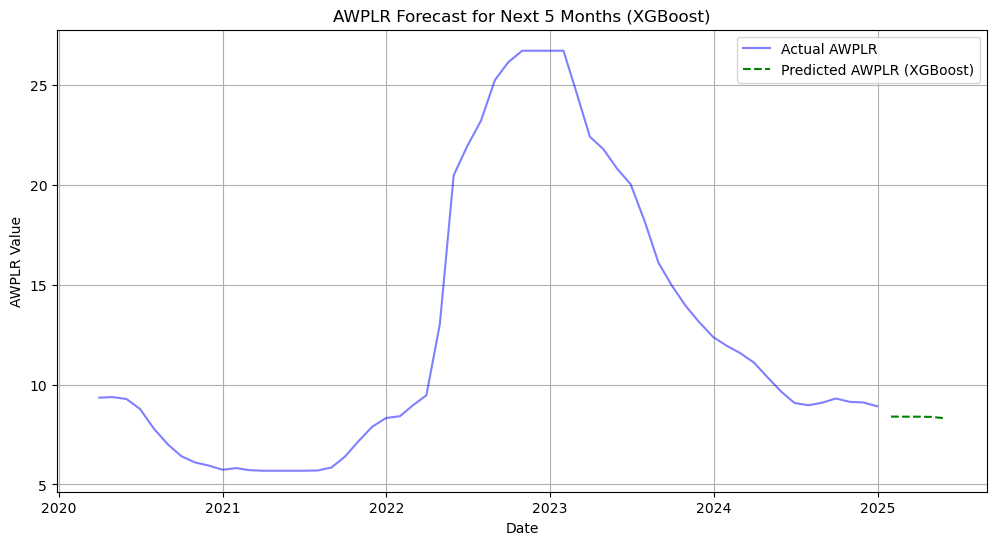

In [172]:
# Generate future dates for 5 months ahead
future_dates_xgb = pd.date_range(start="2025-01-31", periods=5, freq='M')

# Use latest available values for inflation indicators
future_X = pd.DataFrame(np.tile(X.iloc[-1].values, (5, 1)), columns=features, index=future_dates_xgb)

# Update time-based features correctly
future_X["Year"] = future_X.index.year
future_X["Month"] = future_X.index.month
future_X["AWPLR_lag1"] = awplr_inflation_data["AWPLR_smoothed"].iloc[-1]  # Use last known AWPLR value

# Predict AWPLR for the next 5 months
future_y_xgb = xgb_model.predict(future_X)

# Create Forecast DataFrame
forecast_xgb_df = pd.DataFrame({"Date": future_dates_xgb, "AWPLR_Prediction": future_y_xgb})

print(forecast_xgb_df)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(awplr_inflation_data.index, awplr_inflation_data["AWPLR"], label="Actual AWPLR", color="blue", alpha=0.5)
plt.plot(forecast_xgb_df["Date"], forecast_xgb_df["AWPLR_Prediction"], label="Predicted AWPLR (XGBoost)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("AWPLR Value")
plt.title("AWPLR Forecast for Next 5 Months (XGBoost)")
plt.legend()
plt.grid()
plt.show()


In [49]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Load the dataset (assuming it has been uploaded)
file_path = "../data/weekly_awplr_till_2008.csv"  # Ensure correct path if needed
weekly_awplr_data = pd.read_csv(file_path)

# Convert "date" column to datetime format
weekly_awplr_data["date"] = pd.to_datetime(weekly_awplr_data["date"])

# Check for missing values
missing_counts = weekly_awplr_data.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Check for infinite values
inf_counts = (weekly_awplr_data == np.inf).sum() + (weekly_awplr_data == -np.inf).sum()
print("Infinite values per column:\n", inf_counts)

# Fix missing values: Forward fill + Backward fill as fallback
weekly_awplr_data.fillna(method='ffill', inplace=True)
weekly_awplr_data.fillna(method='bfill', inplace=True)

# Fix infinite values: Replace inf with max finite value in column
weekly_awplr_data.replace([np.inf, -np.inf], np.nan, inplace=True)
weekly_awplr_data.fillna(weekly_awplr_data.max(), inplace=True)


print(weekly_awplr_data)


Missing values per column:
 date            0
awplr_weekly    0
dtype: int64
Infinite values per column:
 date            0
awplr_weekly    0
dtype: int64
          date  awplr_weekly
0   2025-02-28          8.36
1   2025-02-21          8.39
2   2025-02-14          8.42
3   2025-02-07          8.59
4   2025-01-31          8.56
..         ...           ...
891 2008-02-01         19.42
892 2008-01-25         17.83
893 2008-01-18         17.49
894 2008-01-11         17.19
895 2008-01-04         19.33

[896 rows x 2 columns]


In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA Model
sarima_model = SARIMAX(
    weekly_awplr_data["awplr_weekly"],  # Use cleaned data
    order=(3,1,3),       # ARIMA parameters (p,d,q)
    seasonal_order=(1,1,1,52),  # Weekly seasonality (s=52 weeks)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Train the model
sarima_fit = sarima_model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06497D-01    |proj g|=  3.92043D-01

At iterate    5    f=  6.05856D-01    |proj g|=  4.67523D-02

At iterate   10    f=  5.95674D-01    |proj g|=  2.44136D-02

At iterate   15    f=  5.94302D-01    |proj g|=  9.86520D-03

At iterate   20    f=  5.93557D-01    |proj g|=  5.55504D-03

At iterate   25    f=  5.93543D-01    |proj g|=  2.20142D-04

At iterate   30    f=  5.93534D-01    |proj g|=  3.28202D-03

At iterate   35    f=  5.93402D-01    |proj g|=  2.54578D-02

At iterate   40    f=  5.92111D-01    |proj g|=  2.70169D-02

At iterate   45    f=  5.91671D-01    |proj g|=  2.45621D-03

At iterate   50    f=  5.91642D-01    |proj g|=  6.57485D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

                             date  AWPLR_Prediction
896 1970-01-04 00:00:00.000000895         38.226647
897 1970-01-11 00:00:00.000000895         57.275414
898 1970-01-18 00:00:00.000000895         76.405227
899 1970-01-25 00:00:00.000000895         95.742185
                           Metric        Value
0       Mean Absolute Error (MAE)    48.952368
1        Mean Squared Error (MSE)  2836.041866
2  Root Mean Squared Error (RMSE)    53.254501
3                  R-Squared (R²) -4188.750134


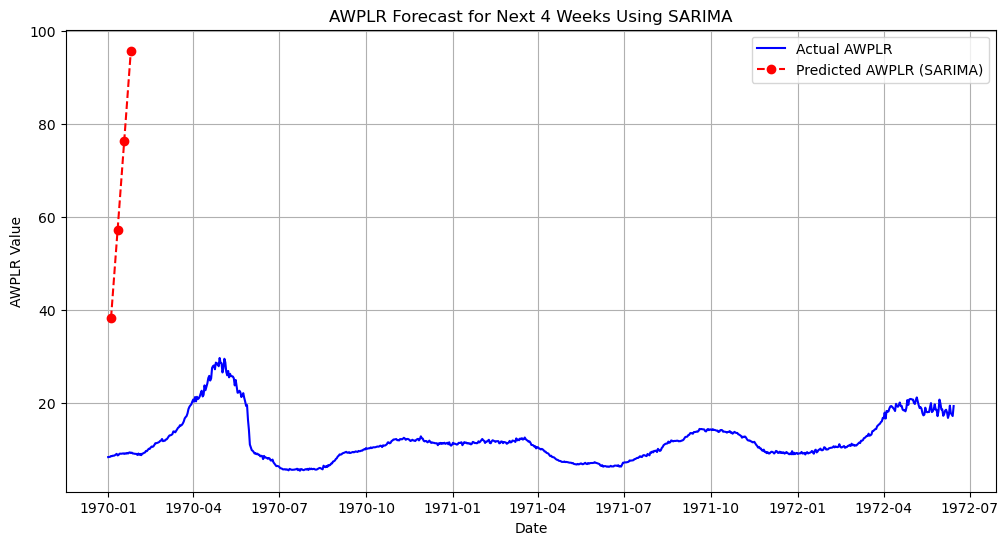

In [93]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Forecast for Next 4 Weeks (1 Month Ahead)
forecast_steps = 4
forecast_values = sarima_fit.forecast(steps=forecast_steps)

# Convert back to original scale (if differenced)
forecast_original_scale = weekly_awplr_data["awplr_weekly"].iloc[-1] + forecast_values.cumsum()

# Generate future dates
future_dates_sarima = pd.date_range(start=weekly_awplr_data.index[-1], periods=forecast_steps, freq='W')

# Convert forecast to DataFrame
forecast_sarima_df = pd.DataFrame({"date": future_dates_sarima, "AWPLR_Prediction": forecast_original_scale})

# Display the forecasted values
print(forecast_sarima_df)

# --- Evaluate SARIMA Model Accuracy ---

# Get actual values (last 4 weeks before forecast)
actual_values = weekly_awplr_data["awplr_weekly"].dropna().iloc[-forecast_steps:]

# Match forecasted values to actual values
predicted_values = forecast_original_scale[:len(actual_values)]

# Compute accuracy metrics
mae_sarima = mean_absolute_error(actual_values, predicted_values)
mse_sarima = mean_squared_error(actual_values, predicted_values)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(actual_values, predicted_values)

# Display accuracy metrics
accuracy_sarima = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mae_sarima, mse_sarima, rmse_sarima, r2_sarima]
})
print(accuracy_sarima)

# --- Plot Actual vs Forecasted Values ---
plt.figure(figsize=(12,6))
plt.plot(weekly_awplr_data.index, weekly_awplr_data["awplr_weekly"], label="Actual AWPLR", color="blue")
plt.plot(forecast_sarima_df["date"], forecast_sarima_df["AWPLR_Prediction"], label="Predicted AWPLR (SARIMA)", color="red", linestyle="dashed", marker='o')
plt.xlabel("Date")
plt.ylabel("AWPLR Value")
plt.title("AWPLR Forecast for Next 4 Weeks Using SARIMA")
plt.legend()
plt.grid()
plt.show()


In [111]:
pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 113.8 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 71.8 kB/s eta 0:00:00a 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [116]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 371.4 kB/s eta 0:00:0000:0100:19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 372.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 471.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 348.4 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
Note: you may need to restart the kernel to use updated packages.
